In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tqdm import tqdm

from metrics import accuracy
from utils import (_fix_seeds, plot_metric_history, show_images)

In [8]:
# load data
mnist = tf.keras.datasets.mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist
X_train, X_test = X_train / 255.0, X_test / 255.0

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X_train = tf.cast(X_train.reshape(-1, 784), tf.float32)
y_train = tf.cast(tf.one_hot(y_train, 10), tf.float32)

X_test = tf.cast(X_test.reshape(-1, 784), tf.float32)
y_test = tf.cast(tf.one_hot(y_test, 10), tf.float32)   

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [10]:
# model
batch_size = 64
num_epochs = 100
optimizer = 'sgd'

initializers = [
    'zeros', 'normal', 'truncated_normal', 'uniform',
    'glorot_normal','glorot_uniform', 
    'he_normal', 'he_uniform'
]
def create_model(init, activation='tanh'):
    model = Sequential()
    model.add(Dense(100, kernel_initializer=init, activation=activation))
    model.add(Dense(100, kernel_initializer=init, activation=activation))
    model.add(Dense(100, kernel_initializer=init, activation=activation))
    model.add(Dense(100, kernel_initializer=init, activation=activation))
    model.add(Dense(10, kernel_initializer=init, activation='softmax'))
    
    return model

def train_model(X_train, y_train, 
                X_test, y_test,
                model, batch_size, num_epochs, optimizer):
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, 
                        verbose=0, validation_data=(X_test, y_test))
    return history

## Tanh activation


In [13]:
%%time
histories = {}

for init in tqdm(initializers):
    model = create_model(init, activation='tanh')
    history = train_model(X_train, y_train, X_test, y_test, model, batch_size, num_epochs, optimizer)
    #print('***Trained:', init)
    histories[init] = history

100%|██████████| 8/8 [06:07<00:00, 45.89s/it]

CPU times: user 7min 41s, sys: 1min 7s, total: 8min 49s
Wall time: 6min 7s


## Relu activation 

In [14]:
 %%time
histories_relu = {}

for init in tqdm(initializers):
    model = create_model(init, activation='relu')
    history = train_model(X_train, y_train, X_test, y_test, model, batch_size, num_epochs, optimizer)
    #print('***Trained:', init)
    histories_relu[init] = history

100%|██████████| 8/8 [05:46<00:00, 43.35s/it]

CPU times: user 7min 19s, sys: 1min 4s, total: 8min 24s
Wall time: 5min 46s


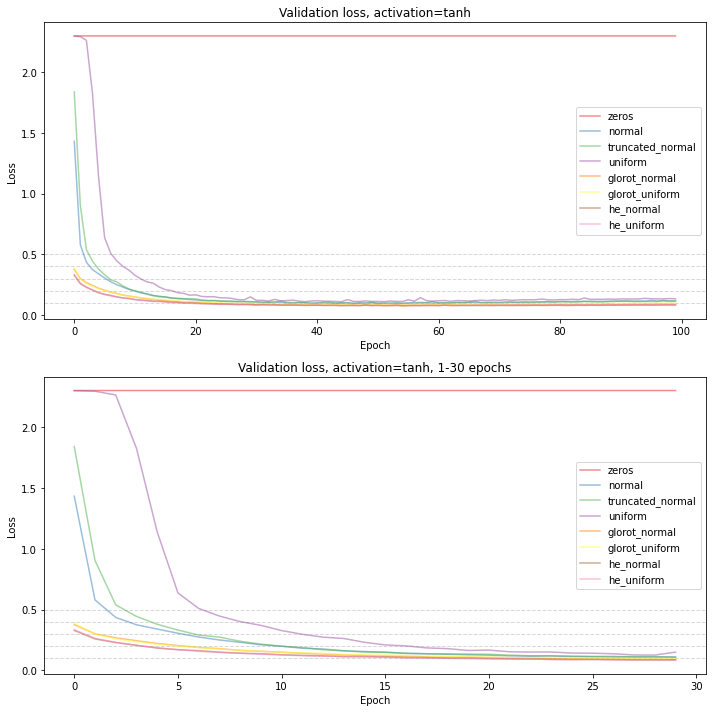

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

ax[0].axhline(y=0.5, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.4, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.3, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.2, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.1, c='grey', alpha=0.3, ls='--', lw=1)
for ind, hist in enumerate(histories):
    ax[0].plot(histories[hist].history['val_loss'], label=hist, alpha=0.5, c=plt.cm.Set1(ind))
    
ax[0].set_title('Validation loss, activation=tanh')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].axhline(y=0.5, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.4, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.3, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.2, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.1, c='grey', alpha=0.3, ls='--', lw=1)
for ind, hist in enumerate(histories):
    ax[1].plot(histories[hist].history['val_loss'][:30], label=hist, alpha=0.5, c=plt.cm.Set1(ind))
    
ax[1].set_title('Validation loss, activation=tanh, 1-30 epochs')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

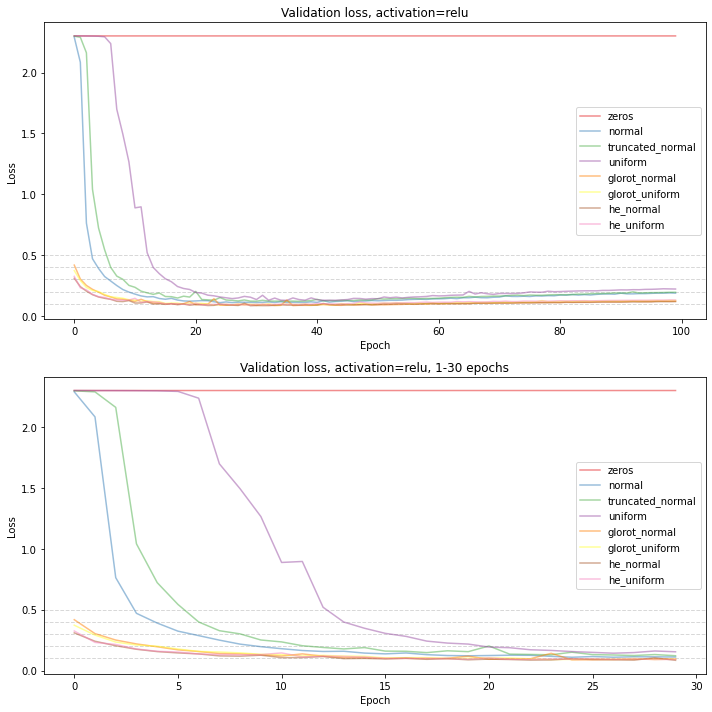

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

ax[0].axhline(y=0.5, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.4, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.3, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.2, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.1, c='grey', alpha=0.3, ls='--', lw=1)
for ind, hist in enumerate(histories_relu):
    ax[0].plot(histories_relu[hist].history['val_loss'], label=hist, alpha=0.5, c=plt.cm.Set1(ind))
    
ax[0].set_title('Validation loss, activation=relu')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].axhline(y=0.5, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.4, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.3, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.2, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.1, c='grey', alpha=0.3, ls='--', lw=1)
for ind, hist in enumerate(histories_relu):
    ax[1].plot(histories_relu[hist].history['val_loss'][:30], label=hist, alpha=0.5, c=plt.cm.Set1(ind))
    
ax[1].set_title('Validation loss, activation=relu, 1-30 epochs')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()
plt.show()